# ANALISIS ESTADISTICO DE REDES SOCIALES
## TALLER 1 :  INTRODUCCIÓN, GESTIÓN Y CONCEPTOS PRELIMINARES

El siguiente documento tiene el fin la realización del primer taller de ejercicios propuestos en la clase de Analisis Estadistico de Redes Sociales usando la libreria **Igraph**. El desarrollo a continuación

### PREGUNTA 1. 

Reproducir ejemplos de RPubs en Python

Reproducir los ejemplos 3.1, 3.2, 3.3, 4.2 y 4.4 de [este documento](https://rpubs.com/jstats1702/931287) en Python utilizando igraph y/o NetworkX.

In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Ejemplo 3.1

In [3]:
# Creamos un grafo no dirigido usando igraph
g = ig.Graph()

# Añadimos nodos y aristas
g.add_vertices(7)

edges = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)]
g.add_edges(edges)

In [4]:
# Mostramos información sobre el grafo
print("Clase del grafo:", type(g))
print("ID del grafo:", id(g))

Clase del grafo: <class 'igraph.Graph'>
ID del grafo: 2854197144656


In [5]:
print("Nodos:", g.vs.indices)
print("Cantidad de nodos:", g.vcount())

Nodos: [0, 1, 2, 3, 4, 5, 6]
Cantidad de nodos: 7


In [6]:
print("Aristas:", g.get_edgelist())
print("Cantidad de aristas:", g.ecount())

Aristas: [(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)]
Cantidad de aristas: 10


In [7]:
print(g)

IGRAPH U--- 7 10 --
+ edges:
0 -- 1 2       2 -- 0 1 4     4 -- 2 3 5     6 -- 3 5
1 -- 0 2 3     3 -- 1 4 5 6   5 -- 3 4 6


In [8]:
print("¿El grafo es ponderado?", g.is_weighted())
print("¿El grafo es simple?", g.is_simple())

¿El grafo es ponderado? False
¿El grafo es simple? True


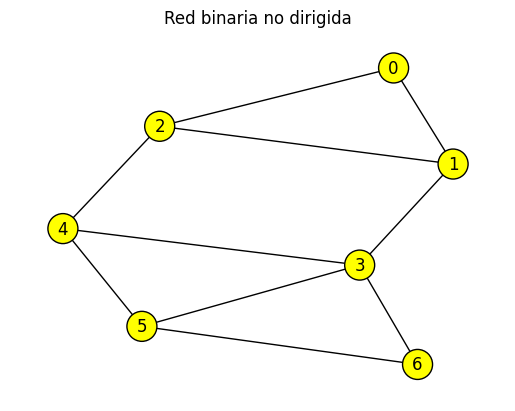

In [9]:
# Grafica de la red binaria no dirigida

layout = g.layout("kamada_kawai")  # Especificamos el algoritmo de disposición (Kamada-Kawai)
fig, ax = plt.subplots()

# Vertex_color: Controla el color de los vertices
# Vertex_size: Controla el tamaño de los vertices
# Vertex_label_size: Controla el tamaño de los nombres de los vertices
# Vertex_label_dist: Controla la distancia entre el vertice y el label
# edge_color: Controla el color de la arista.
# edge_width: Controla el ancho de la arista.
# vertex_label: Controla los indices de los vertices

ig.plot(g, target=ax, layout=layout, vertex_color="yellow", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=1, vertex_label=g.vs.indices)
plt.title("Red binaria no dirigida")
plt.show()

In [10]:
# EJEMPLO 3.2

In [11]:
# red ponderada no dirigida
random.seed(1)
wg = g.copy()
wg.es["weight"] = [round(random.uniform(0, 1), 3) for _ in range(wg.ecount())]

In [12]:
# pesos
print(wg.es["weight"])

# ponderada?
print("¿El grafo ponderado?", wg.is_weighted())

[0.134, 0.847, 0.764, 0.255, 0.495, 0.449, 0.652, 0.789, 0.094, 0.028]
¿El grafo ponderado? True


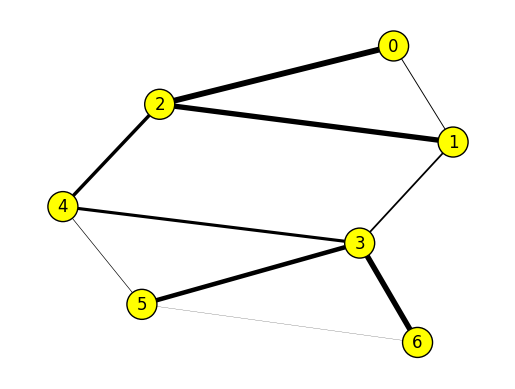

In [13]:
# Graficar la red ponderada no dirigida
fig, ax = plt.subplots()
layout = g.layout("kamada_kawai")

edge_width = [5 * weight for weight in wg.es["weight"]]
ig.plot(wg, target=ax, layout=layout, vertex_color="yellow", vertex_size=30, vertex_label_size=12, 
        vertex_label_dist = 0, edge_color="black", edge_width=edge_width, vertex_label=wg.vs.indices,
       main="Red ponderada no dirigida")

plt.show()

In [14]:
# EJEMPLO 3.3

In [15]:
# red binaria dirigida
dg = ig.Graph(directed=True)
dg.add_vertices(3)
dg.add_edges([(0, 1), (0, 2), (1, 2), (2, 1)])

In [16]:
# aristas
print("Aristas: \n")
for e in dg.vs:
    print(e)

Aristas: 

igraph.Vertex(<igraph.Graph object at 0x0000029891DA3850>, 0, {})
igraph.Vertex(<igraph.Graph object at 0x0000029891DA3850>, 1, {})
igraph.Vertex(<igraph.Graph object at 0x0000029891DA3850>, 2, {})


In [17]:
# etiquetas
dg.vs["name"] = ["Juan", "Maria", "Pedro"]

# agregar 'sexo' como atributo
dg.vs["sexo"] = ["M", "F", "M"]

In [18]:
# aristas
print("Aristas: \n")
for e in dg.vs:
    print(e)

Aristas: 

igraph.Vertex(<igraph.Graph object at 0x0000029891DA3850>, 0, {'name': 'Juan', 'sexo': 'M'})
igraph.Vertex(<igraph.Graph object at 0x0000029891DA3850>, 1, {'name': 'Maria', 'sexo': 'F'})
igraph.Vertex(<igraph.Graph object at 0x0000029891DA3850>, 2, {'name': 'Pedro', 'sexo': 'M'})


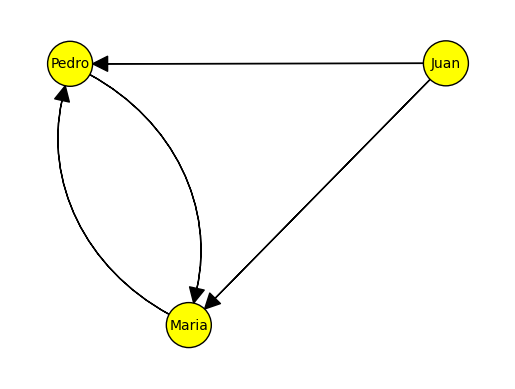

<Figure size 800x600 with 0 Axes>

In [19]:
# Graficar la red binaria dirigida
fig, ax = plt.subplots()
#layout = g.layout("kamada_kawai")

plt.figure(figsize=(8, 6))
ig.plot(dg, target=ax, vertex_color="yellow", edge_width = 1 , vertex_size=45, vertex_label_size=10, 
        vertex_label_dist = 0, edge_color="black", vertex_label=dg.vs["name"], main="Red ponderada no dirigida")


plt.show()

In [20]:
# EJEMPLO 4.2

In [21]:
# red binaria no dirigida
g = ig.Graph(edges=[(0, 1), (0, 2), (1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 5), (5, 6)])

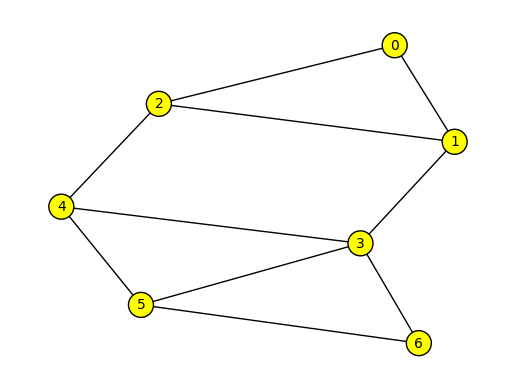

In [22]:
#GRAFICA 
fig, ax = plt.subplots()
layout = g.layout("kamada_kawai")  # disposición de los vértices

#plt.figure(figsize=(10, 10))
ig.plot(g, target=ax, vertex_color="yellow", vertex_size=25, vertex_label_size=10, 
        vertex_label_dist = 0 ,edge_color="black", edge_width = 1 ,vertex_label=g.vs.indices, 
        main="Red ponderada no dirigida")

In [23]:
# matriz de adyacencia
A = g.get_adjacency()

# clase de objeto
print("Clase de objeto:", type(A))

# imprime la matriz de adyacencia
print("Matriz de adyacencia:")
print(A)

Clase de objeto: <class 'igraph.datatypes.Matrix'>
Matriz de adyacencia:
[[0, 1, 1, 0, 0, 0, 0]
 [1, 0, 1, 1, 0, 0, 0]
 [1, 1, 0, 0, 1, 0, 0]
 [0, 1, 0, 0, 1, 1, 1]
 [0, 0, 1, 1, 0, 1, 0]
 [0, 0, 0, 1, 1, 0, 1]
 [0, 0, 0, 1, 0, 1, 0]]


In [24]:
# formato 'matrix array'
Y = np.array(g.get_adjacency().data)

# clase de objeto
print("Clase de objeto:", type(Y))

# simétrica?
print("¿Es simétrica?", np.array_equal(Y, Y.T))

# imprime la matriz de adyacencia en formato 'matrix array'
print("Matriz de adyacencia:")
print(Y)

Clase de objeto: <class 'numpy.ndarray'>
¿Es simétrica? True
Matriz de adyacencia:
[[0 1 1 0 0 0 0]
 [1 0 1 1 0 0 0]
 [1 1 0 0 1 0 0]
 [0 1 0 0 1 1 1]
 [0 0 1 1 0 1 0]
 [0 0 0 1 1 0 1]
 [0 0 0 1 0 1 0]]


In [25]:
# versión vectorizada exhaustiva
yvec1 = Y[np.tril_indices(Y.shape[0], k=-1)]

print("Versión vectorizada exhaustiva:", yvec1)

Versión vectorizada exhaustiva: [1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1]


In [26]:
# versión vectorizada indexada
yvec2 = np.where(yvec1 == 1)

print("Versión vectorizada indexada:", yvec2)

Versión vectorizada indexada: (array([ 0,  1,  2,  4,  8,  9, 13, 14, 18, 20], dtype=int64),)


In [27]:
# EJEMPLO 4.4

In [28]:
n = Y.shape[0]
A = []

for i in range(n - 1):
    for j in range(i + 1, n):
        if Y[i, j] == 1:
            A.append([i, j])

In [29]:
A = np.array(A)

print("Clase de objeto:", type(A))
print(A)

Clase de objeto: <class 'numpy.ndarray'>
[[0 1]
 [0 2]
 [1 2]
 [1 3]
 [2 4]
 [3 4]
 [3 5]
 [3 6]
 [4 5]
 [5 6]]


### PREGUNTA 2. 

Grafo $G=(V, E)$ Considere el grafo $G=(V, E)$, con:

$$
V=\{1,2,3,4,5\} \hspace{1cm}
E=\{\{1,2\}, \{1,3\}, \{2,3\}, \{2,4\}, \{2,5\}, \{3,5\}, \{4,5\}\}
$$

- Visualizar $G$

- (b) Calcular orden, tamaño y diámetro del grafo

- (c) Calcular el grado de cada vértice

- (d) Graficar el subgrafo generado por los nodos 1, 2, 3 y 4


In [30]:
import igraph as ig

In [31]:
g = ig.Graph()
g.add_vertices(5) # Indicamos cuantos vertices tiene 
g.add_edges([(0,1),(0,2),(1,2),(1,3),(1,4),(2,4), (3,4)]) # 
g.vs["label"] = [1,2,3,4,5]

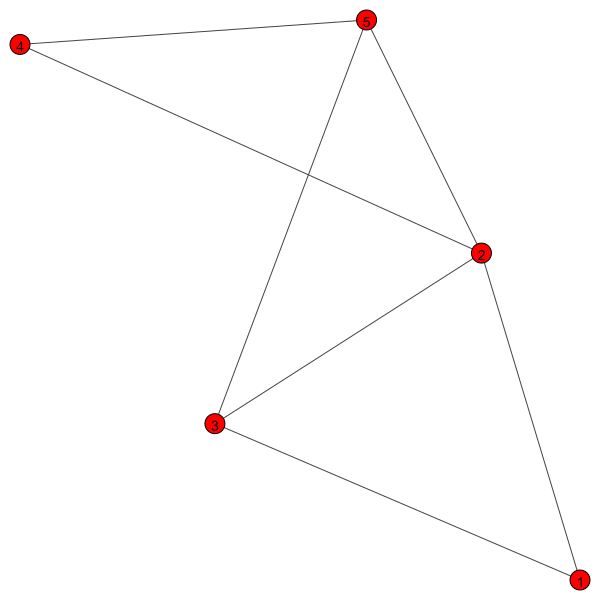

In [32]:
ig.plot(g)

In [33]:
print('El orden del grafo es: ' + str(g.vcount()) + ' El Diametro del grafo es: ' + str(g.diameter()) + 
      '\nEl tamaño del grafo es: ' + str(g.ecount()))

El orden del grafo es: 5 El Diametro del grafo es: 2
El tamaño del grafo es: 7


In [34]:
print('El grado de cada vertice es :' + str( g.degree()) + ' El indegree es :' +  str( g.indegree())
      + '\nEl out degree es :' + str(g.outdegree()))

El grado de cada vertice es :[2, 4, 3, 2, 3] El indegree es :[2, 4, 3, 2, 3]
El out degree es :[2, 4, 3, 2, 3]


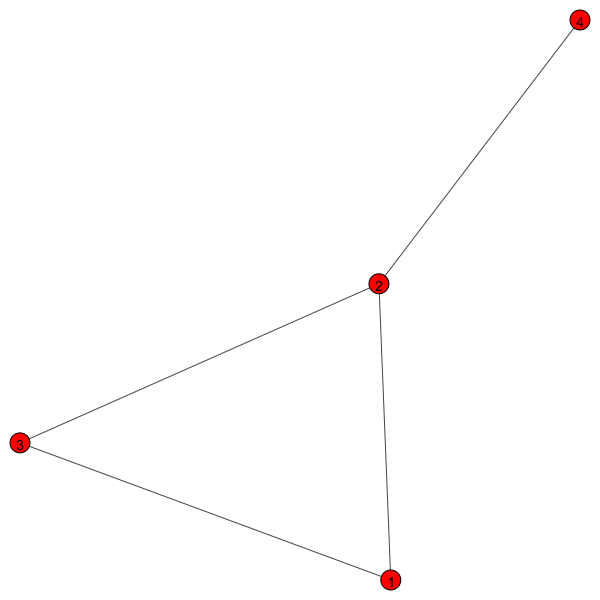

In [35]:
ig.plot(g.subgraph((0,1,2,3)))

### PREGUNTA 3. 

Digrafo $G=(V, E)$ Considere el digrafo $G=(V, E)$, con:

$$
V=\{1,2,3,4,5\} \hspace{1cm} E=\{(1,3), (2,3), (2,4), (2,5), (3,1), (3,5), (4,5), (5,4)\}
$$

- Visualizar $G$

- Calcular orden, tamaño y diámetro del grafo

- Calcular el grado de cada vértice del grafo

- Graficar el subgrafo generado por los nodos 1, 2, 3 y 4


In [36]:
g = ig.Graph(directed=True)
g.add_vertices(5) # Indicamos cuantos vertices tiene 
g.add_edges([(0,2),(1,2),(1,3),(1,4),(2,0),(2,4),(3,4),(4,3)]) 
g.vs["label"] = [1,2,3,4,5]

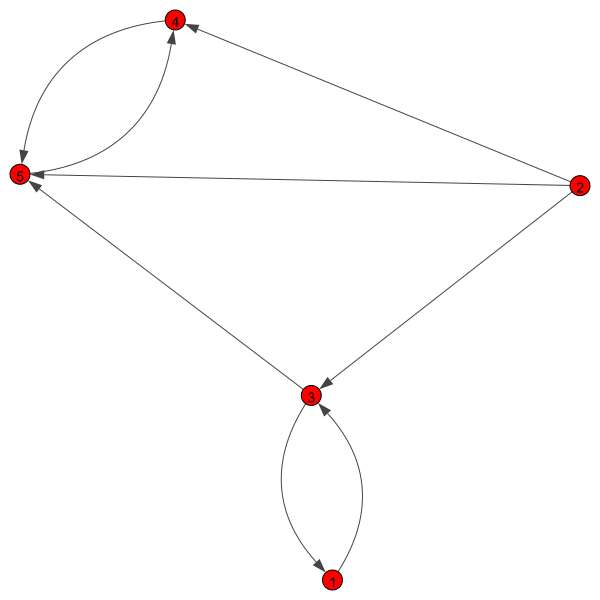

In [37]:
ig.plot(g)

In [38]:
print('El orden del grafo es: ' + str(g.vcount()) + ' El Diametro del grafo es: ' + str(g.diameter()) + 
      '\nEl tamaño del grafo es: ' + str(g.ecount()))

El orden del grafo es: 5 El Diametro del grafo es: 3
El tamaño del grafo es: 8


In [39]:
print('El grado de cada vertice es :' + str( g.degree()) + ' El indegree es :' +  str( g.indegree())
      + '\nEl out degree es :' + str(g.outdegree()))

El grado de cada vertice es :[2, 3, 4, 3, 4] El indegree es :[1, 0, 2, 2, 3]
El out degree es :[1, 3, 2, 1, 1]


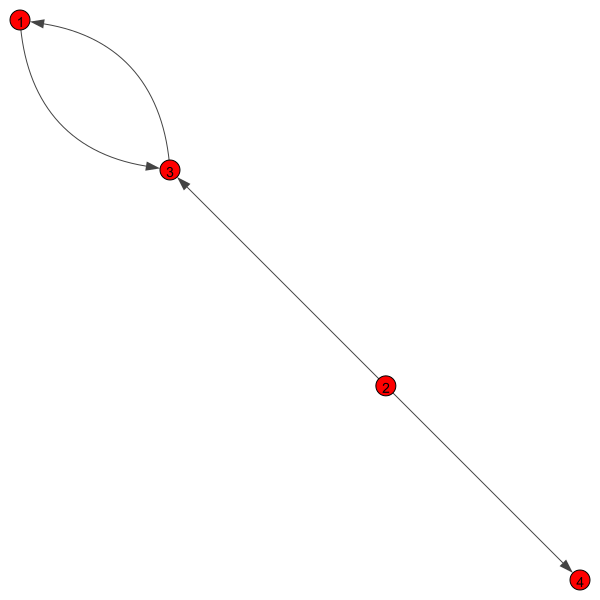

In [40]:
ig.plot(g.subgraph((0,1,2,3)))

### PREGUNTA 4. 

Estados triádicos no dirigidos

- Graficar todos los posibles estados triádicos no dirigidos.

- Identificar los estados isomorfos.

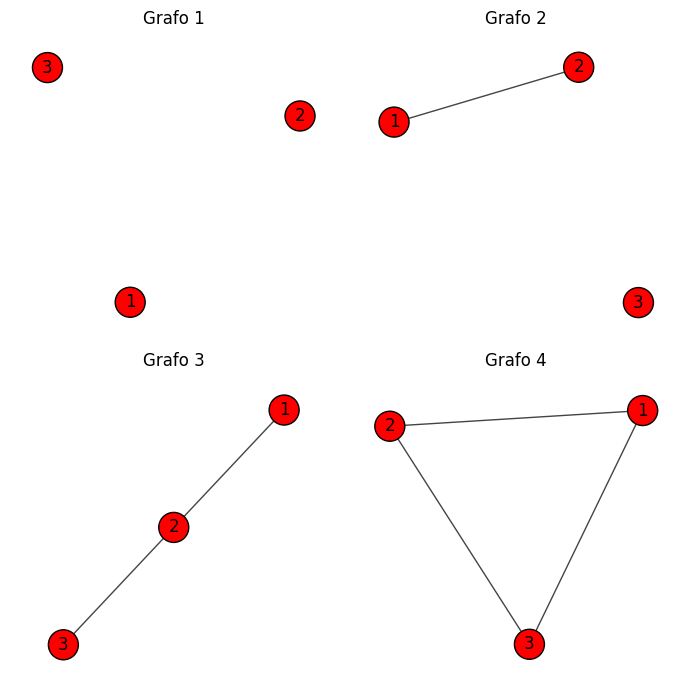

In [41]:
import matplotlib.pyplot as plt
# Crear los grafos
g0 = ig.Graph(directed=False)
g0.add_vertices(3)
g0.vs["label"] = [1,2,3]

g = ig.Graph(directed=False)
g.add_vertices(3)
g.add_edges([(0,1)])
g.vs["label"] = [1,2,3]

g1 = ig.Graph(directed=False)
g1.add_vertices(3)
g1.add_edges([(0,1),(1,2)])
g1.vs["label"] = [1,2,3]

g2 = ig.Graph(directed=False)
g2.add_vertices(3)
g2.add_edges([(0,1),(1,2),(0,2)])
g2.vs["label"] = [1,2,3]

# Plotear los gráficos en subplots
def graficar_grafos(grafos):
    plt.figure(figsize=(7, 7))
    num_grafos = len(grafos)
    rows = (num_grafos + 2) // 3
    cols = min(num_grafos, 2)
    
    for i, g in enumerate(grafos, 1):
        plt.subplot(rows, cols, i)
        ig.plot(g, bbox=(0, 0, 100, 100), edge_width = 1,  target=plt.gca())
        plt.title(f"Grafo {i}")

    plt.tight_layout()
    plt.show()
    
graficar_grafos([g0,g,g1,g2])

In [42]:
# Lista para almacenar los estados isomorfos
isomorphic_states = []

# Verificar isomorfismo entre todos los pares de grafos
for i in range(len([g0, g, g1, g2])):
    for j in range(i+1, len([g0, g, g1, g2])):
        if [g0, g, g1, g2][i].isomorphic([g0, g, g1, g2][j]):
            isomorphic_states.append((i+1, j+1))

if isomorphic_states:
    print("Los estados isomorfos son:", isomorphic_states)
else:
    print("No hay estados isomorfos.")

plt.show()

No hay estados isomorfos.


### PREGUNTA 5. 

Visualizar grafos conectados con 4 vértices

Visualizar todos los grafos (no dirigidos) conectados con 4 vértices.

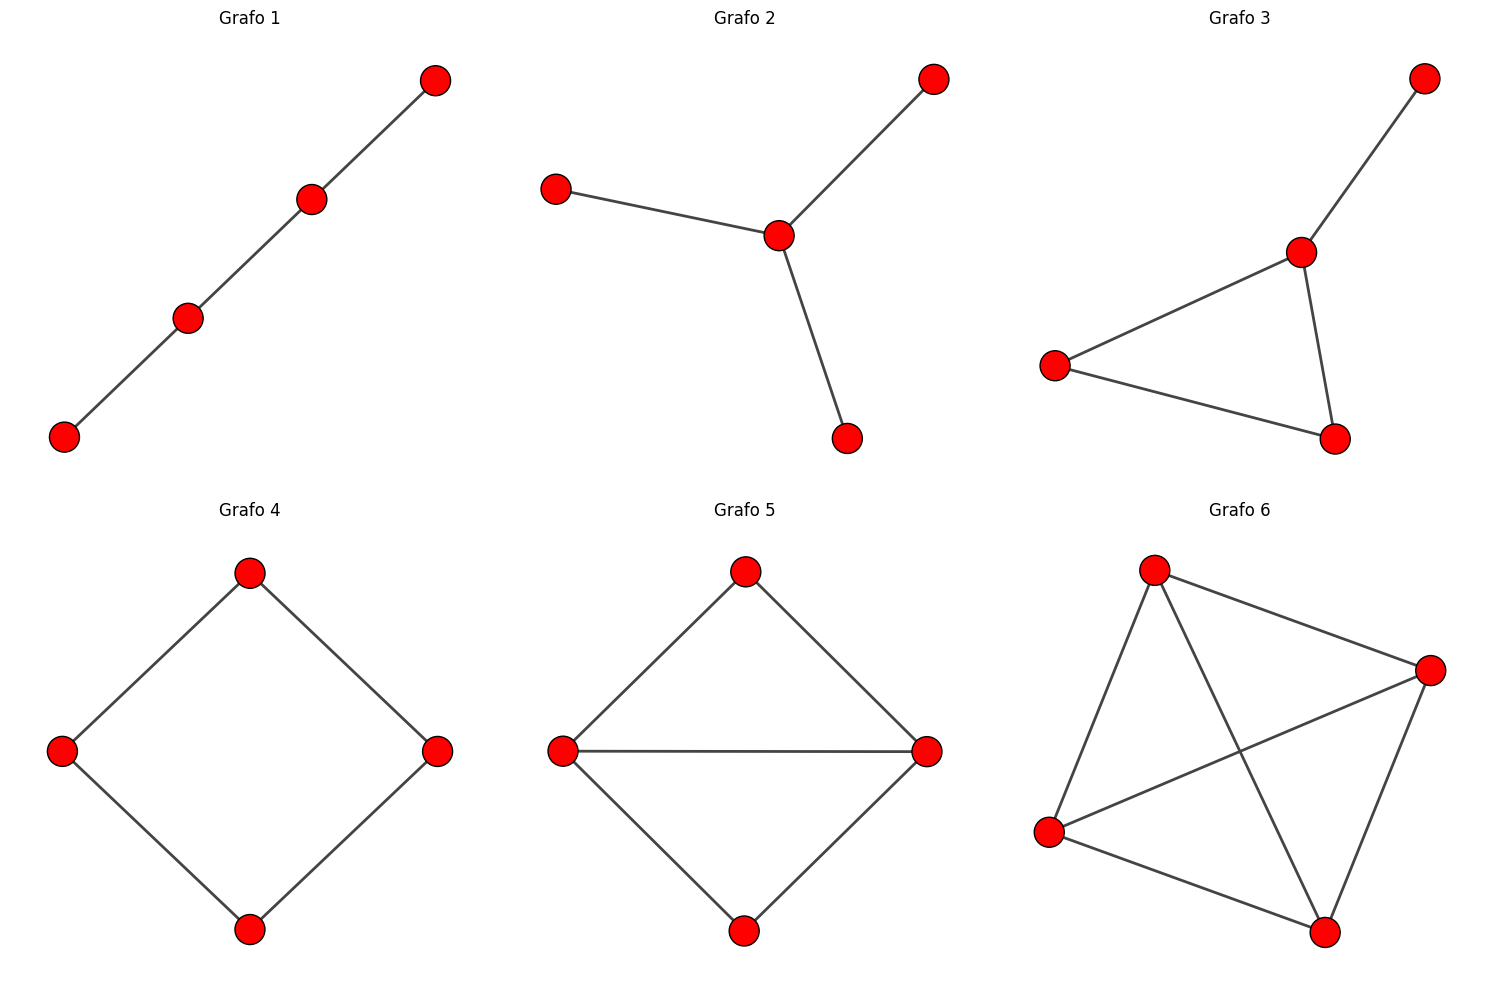

In [43]:
# Crear los grafos
g =ig.Graph(directed=False)
g.add_vertices(4)
g.add_edges([(0,1),(1,2),(2,3)])

g1 = ig.Graph(directed=False)
g1.add_vertices(4)
g1.add_edges([(0,1),(1,2),(1,3)])

g2 = ig.Graph(directed=False)
g2.add_vertices(4)
g2.add_edges([(0,1),(1,2),(1,3),(2,3)])

g3 = ig.Graph(directed=False)
g3.add_vertices(4)
g3.add_edges([(0,1),(1,2),(2,3),(3,0)])

g4 = ig.Graph(directed=False)
g4.add_vertices(4)
g4.add_edges([(0,1),(1,2),(2,3),(3,0),(0,2)])

g5 = ig.Graph(directed=False)
g5.add_vertices(4)
g5.add_edges([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)])

# Plotear los gráficos en subplots

def graficar_grafos(grafos):
    plt.figure(figsize=(15, 10))
    num_grafos = len(grafos)
    rows = (num_grafos + 2) // 3
    cols = min(num_grafos, 3)
    
    for i, g in enumerate(grafos, 1):
        plt.subplot(rows, cols, i)
        ig.plot(g, bbox=(0, 0, 100, 100), target=plt.gca())
        plt.title(f"Grafo {i}")

    plt.tight_layout()
    plt.show()
    
graficar_grafos([g,g1,g2,g3,g4,g5])


### PREGUNTA 6. 

Reconstrucción de la matriz de adyacencia

- Escribir una rutina que reconstruya la matriz de adyacencia a partir de la matriz de aristas y una lista de vértices.

- Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios con probabilidad de éxito 0.1 y probar la rutina con la red simulada.

- Visualizar la red simulada mediante un grafo y una socio-matriz.

### Simulacion matriz aristas o adyacencia
Se crea una funcion para generar matrices de adyacencia o de aristas con probabilidad $p$.

In [44]:
import numpy as np

def redA(n=5, p=0.5, dirigida=False, Aristas=False, semilla=123):
    np.random.seed(semilla)
    if Aristas:
        A = np.empty((0, 2), dtype=int) # array vacio con dos columnas
        if dirigida:
            # Crear lista de aristas dirigidas con probabilidad p
            for i in range(n):
                for j in range(n): # se hace con n al ser dirigida
                    if j != n and np.random.binomial(size=1, n=1, p=p)[0] == 1: # si j es diferente de i se agreaga a la matriz de aristas 
                        
                        A = np.vstack((A, [i, j]))
            # Devolver lista de aristas y lista de nodos
            return A, np.array(list(range(n)))
        else:
            # Crear lista de aristas no dirigidas con probabilidad p
            for i in range(n-1):
                for j in range(i+1, n): # se hace con i+1 al ser no dirigida
                    if np.random.binomial(size=1, n=1, p=p)[0] == 1:
                        A = np.vstack((A, [i, j]))
            # Devolver lista de aristas y lista de nodos
            return A, np.array(list(range(n)))
    else:
        if dirigida:
            # Crear matriz de adyacencia dirigida con probabilidad p
            M = np.random.binomial(size=(n, n), n=1, p=p)
            np.fill_diagonal(M, 0)
            return M.astype(int)
        else:
            # Crear matriz de adyacencia no dirigida simétrica con probabilidad p
            M = np.triu(np.random.binomial(size=(n, n), n=1, p=p))
            M = M + M.T 
            np.fill_diagonal(M, 0)
            return M.astype(int)


In [80]:
M=redA(n=25,p=0.1,Aristas=True)
print(M)

(array([[ 0,  7],
       [ 1, 16],
       [ 2,  3],
       [ 3, 19],
       [ 4,  6],
       [ 5, 15],
       [ 5, 16],
       [ 5, 20],
       [ 5, 21],
       [ 6, 12],
       [ 6, 20],
       [ 8, 12],
       [ 8, 19],
       [ 9, 18],
       [10, 19],
       [11, 24],
       [12, 14],
       [12, 15],
       [13, 17],
       [13, 22],
       [14, 16],
       [15, 16],
       [15, 23],
       [19, 21],
       [19, 24],
       [20, 24],
       [21, 23]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]))


In [79]:
import numpy as np

def mad(A, V, dirigida=False):
    n = len(V)
    M = np.zeros((n, n), dtype=int)  # Creamos una matriz de ceros de tamaño n x n
    
    if dirigida:
        # Si el grafo es dirigido, asignamos 1 a las posiciones correspondientes
        for k in range(len(A)):
            i = np.where(V == A[k, 0])[0][0]  # Obtenemos el nodo i que se relaciona con el nodo j en la k-ésima posición de la matriz de aristas
            j = np.where(V == A[k, 1])[0][0]  # Obtenemos el nodo j que está relacionado con el nodo i en la k-ésima posición de la matriz de aristas
            M[i, j] = 1  # Asignamos 1 en la posición correspondiente
            
    else:
        # Si el grafo no es dirigido, asignamos 1 a las posiciones correspondientes y su simétrica
        for k in range(len(A)):
            i = np.where(V == A[k, 0])[0][0]  # Obtenemos el nodo i relacionado con el nodo j en la k-ésima posición de la matriz de aristas
            j = np.where(V == A[k, 1])[0][0]  # Obtenemos el nodo j relacionado con el nodo i en la k-ésima posición de la matriz de aristas
            M[i, j] = 1  # Asignamos 1 en la posición correspondiente
            M[j, i] = 1  # Asignamos 1 en la posición simétrica
            
    return M


In [47]:
# Create graph, A.astype(bool).tolist() or (A / A).tolist() can also be used.
g=ig.Graph(directed=False)
g = ig.Graph.Adjacency((mad(M[0],M[1]) > 0), mode='unirected')

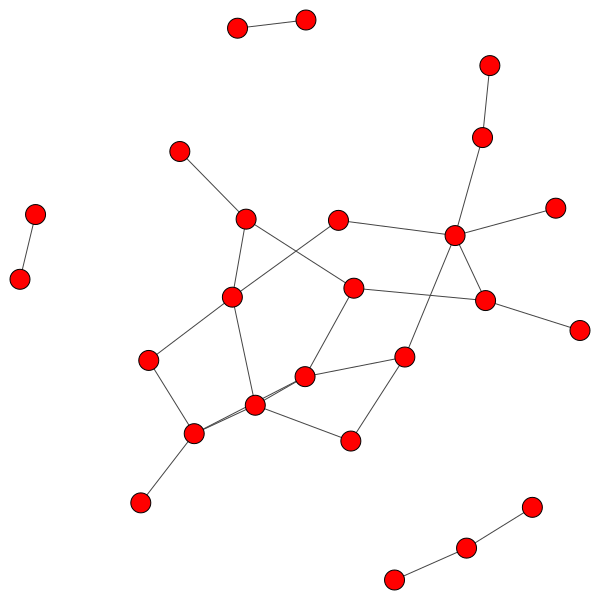

In [48]:
import random
random.seed(123)
ig.plot(g)

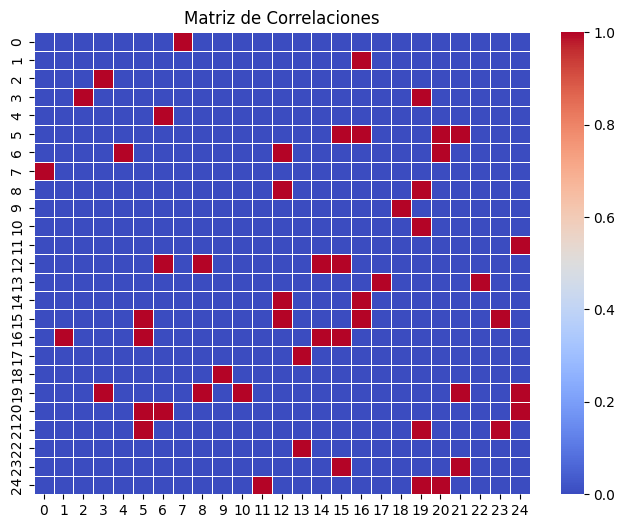

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(mad(M[0],M[1]), annot=False, cmap='coolwarm', fmt=".2f", linewidths= 0.5 )
plt.title('Matriz de Correlaciones')
plt.show()

### PREGUNTA 7. 

Escribir una rutina que reconstruya la matriz de aristas y la lista de vértices a partir de la matriz de adyacencia.

- Simular una red no dirigida de 25 nodos generada a partir de enlaces aleatorios independientes e idénticamente distribuidos con probabilidad de éxito 0.1

- Probar la rutina con la red simulada.

- Visualizar la red simulada por medio de un grafo y una socio-matriz.

In [50]:
Matriz=redA(n=25,Aristas=False,p=0.1)

In [51]:
def ArVe(M, dirigida=False):
    # Crear una lista de vértices
    V = list(range(M.shape[1]))
    
    # Crear un array vacío para almacenar las aristas
    A = np.empty((0, 2), dtype=int)
    
    # Verificar si el grafo es dirigido o no dirigido
    if dirigida:
        
        for i in range(M.shape[0]):  # se toma la i-esima fila de la matriz
            for j in range(M.shape[1]):  # toma la j-esima fila de la i-esima fila de la matriz
                if M[i, j] == 1:  # Si hay un uno en la posicion i,j
                    A = np.vstack([A, [i, j]])  # Agregar la arista a A
                    
    else:
      
        for i in range(M.shape[0] - 1):  #se toma la i-esima fila de la matriz excluyendo la ultima que se conoce su valor el cual es cero
            for j in range(i + 1, M.shape[1]):  # se toma la j-esima fila mayor que i dado que analizamos la matriz triangular inferior
                if M[i, j] == 1:  # Si hay una arista entre i y j
                    A = np.vstack([A, [i, j]])  # Agregar la arista a A
                    
    return [A,V]

In [52]:
print(ArVe(Matriz)[1])
print(ArVe(Matriz)[0])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[[ 0  6]
 [ 1 13]
 [ 1 22]
 [ 3  9]
 [ 3 16]
 [ 4 19]
 [ 4 20]
 [ 4 24]
 [ 5  9]
 [ 5 17]
 [ 6 17]
 [ 6 24]
 [ 7 13]
 [ 8 21]
 [ 8 23]
 [ 8 24]
 [ 9 12]
 [ 9 17]
 [ 9 21]
 [10 12]
 [11 14]
 [11 18]
 [11 20]
 [12 15]
 [12 17]
 [12 22]
 [13 15]
 [13 16]
 [14 20]
 [15 17]
 [16 22]
 [17 20]
 [18 24]
 [19 20]
 [19 22]
 [20 22]
 [22 23]]


In [53]:
g = ig.Graph()
g.add_vertices((ArVe(Matriz)[1]))
g.add_edges((ArVe(Matriz)[0]))

In [54]:
 g.get_edgelist()

[(0, 6),
 (1, 13),
 (1, 22),
 (3, 9),
 (3, 16),
 (4, 19),
 (4, 20),
 (4, 24),
 (5, 9),
 (5, 17),
 (6, 17),
 (6, 24),
 (7, 13),
 (8, 21),
 (8, 23),
 (8, 24),
 (9, 12),
 (9, 17),
 (9, 21),
 (10, 12),
 (11, 14),
 (11, 18),
 (11, 20),
 (12, 15),
 (12, 17),
 (12, 22),
 (13, 15),
 (13, 16),
 (14, 20),
 (15, 17),
 (16, 22),
 (17, 20),
 (18, 24),
 (19, 20),
 (19, 22),
 (20, 22),
 (22, 23)]

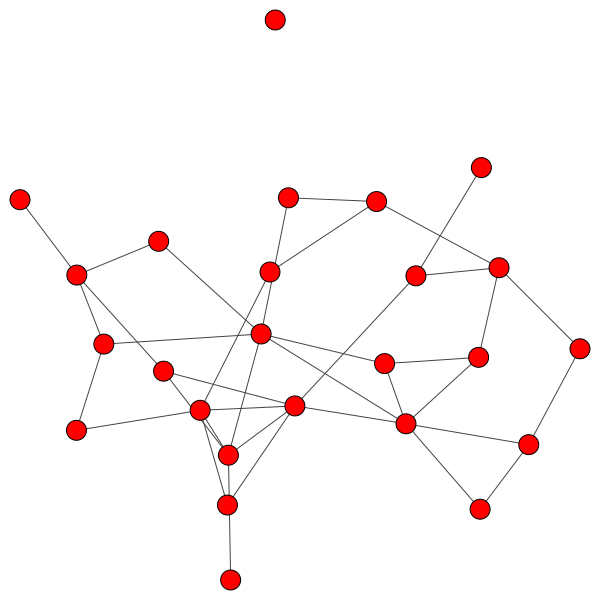

In [55]:
random.seed(123)
ig.plot(g)

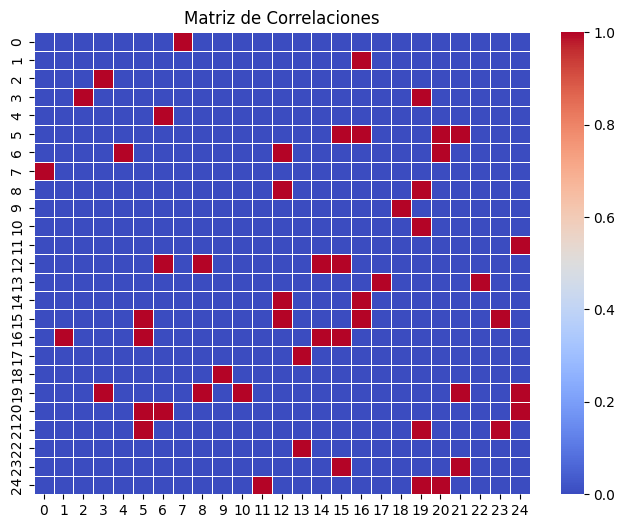

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(mad(M[0],M[1]), annot=False, cmap='coolwarm', fmt=".2f", linewidths= 0.5)
plt.title('Matriz de Correlaciones')
plt.show()

### PREGUNTA 8 

Escribir una rutina que simule redes tanto dirigidas como no dirigidas a partir de enlaces aleatorios independientes e idénticamente distribuidos con una probabilidad de éxito dada. Esta rutina debe tener como argumentos el orden de la red, la probabilidad de interacción (por defecto 0.5), el tipo de red (por defecto como no dirigida) y la semilla (por defecto 123), y además, tener como retorno una versión vectorizada de la matriz de adyacencia y una visualización. Probar esta rutina generando cuatro casos diferentes.


In [57]:
def v(A):
    v = []  # Inicializar una lista vacía
    for i in range(0, A.shape[1]):  # Recorrer las columnas de la matriz
        for j in range(i + 1, A.shape[1]):  # Recorrer las columnas después de i
            v.append(A[j, i])  # Agregar el valor de A[j, i] a v
    v = np.array(v)
    return v  # Devolver la lista v

def M(v): # para redes no dirigidas se desarrollo como ejercicio de clase la otra se puede sacar m
    n=int(np.roots([1,-1,-2*v.shape[0]])[np.roots([1,-1,-2*v.shape[0]])>0][0]) # calcula el tamaño de la matriz
    M=np.zeros((n, n))
    k=0
    for j in range(0,n-1): # recorre las columnas
        for i in range(j+1,n): # recorre las filas
            M[i][j]=v[k] 
            k=k+1
    return M+M.T # suma la transpuesta de M


def funcion(n, p=0.5, dirigida=False, semilla=123):
    M = redA(n=n, p=p, dirigida=dirigida, semilla=semilla)
    if dirigida:
        g = ig.Graph.Adjacency((M > 0).tolist())
        random.seed(semilla)
    
        return (M.flatten(),ig.plot(g))  # Devolver matriz vectorizada dirigida
    else:
        g = ig.Graph.Adjacency((M > 0).tolist(), mode='undirected')
        random.seed(semilla)
        ig.plot(g)
        plt.show()
        return (v(M),ig.plot(g))  # Devolver matriz vectorizada no dirigida

In [58]:
funcion(n=3)[0]

array([0, 0, 0])

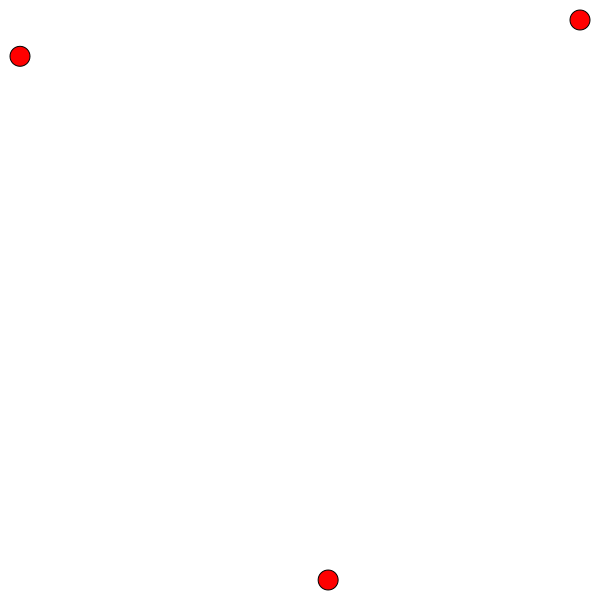

In [59]:
funcion(n=3)[1]

In [60]:
funcion(n=3,dirigida=True)[0]

array([0, 0, 0, 1, 0, 0, 1, 1, 0])

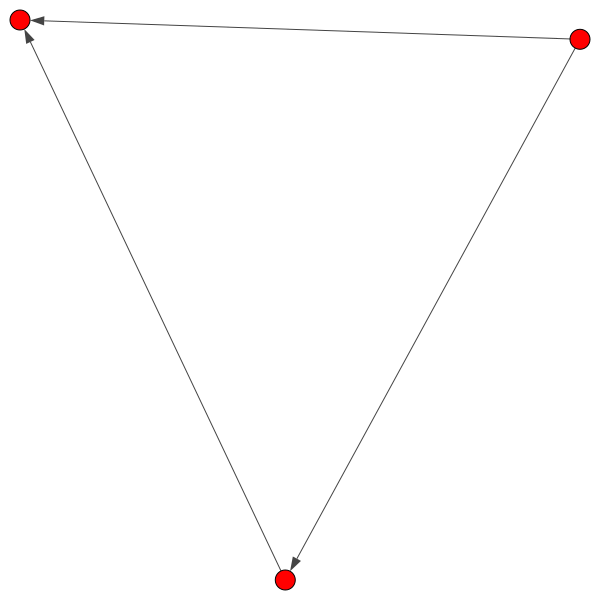

In [61]:
funcion(n=3,dirigida=True)[1]

In [62]:
funcion(n=4)[0]

array([0, 0, 1, 1, 1, 1])

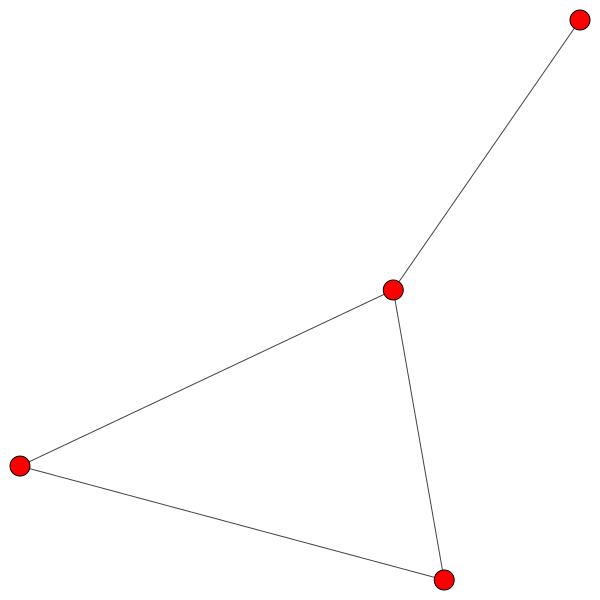

In [63]:
funcion(n=4)[1]

In [64]:
funcion(n=4,dirigida=True,semilla=1)[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

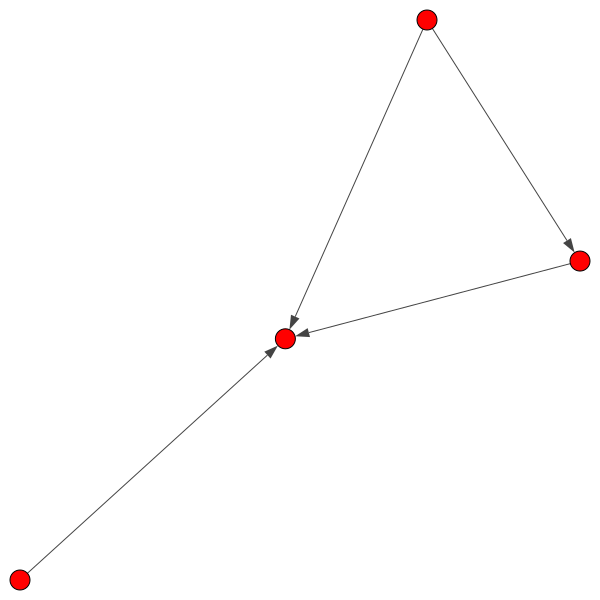

In [65]:
funcion(n=4,dirigida=True,semilla=1)[1]

### PREGUNTA 9. Conjunto de Datos addhealth

Considere el conjunto de datos dado en el archivo `addhealth.RData` disponible en la página web del curso. Estos datos fueron recopilados por The National Longitudinal Study of Adolescent Health y están asociados con un estudio escolar sobre salud y comportamientos sociales de adolescentes de varias escuelas en los Estados Unidos. Los participantes nominaron hasta 5 niños y 5 niñas como amigos y reportaron el número de actividades extracurriculares en las que participaron juntos.

El archivo `addhealth.RData` contiene una lista con dos arreglos, `X` y `E`. `X` tiene tres campos: `female` (0 = No, 1 = Sí), `race` (1 = Blanco, 2 = Negro, 3 = Hispano, 4 = Otro), y `grade` (grado del estudiante). `E` también tiene tres campos: `V1` (vértice de salida), `V2` (vértice de llegada), y `activities` (número de actividades extracurriculares).

- Identificar y clasificar las variables nodales

- Identificar y clasificar las variables relacionales

- Calcular el orden, el tamaño y el diámetro de la red

- Visualizar la red sin tener en cuenta las variables nodales por medio de un grafo y una socio-matriz

- Identificar el top 5 de los nodos más propensos a emitir/recibir relaciones

In [66]:
E = pd.read_csv('E.csv')
X = pd.read_csv('X.csv')

In [67]:
A=E[['V1', 'V2']]
A=np.array(A)
print(A)

[[  1   2]
 [  1  24]
 [  1  42]
 ...
 [254  32]
 [254 119]
 [254 175]]


In [68]:
g=ig.Graph.TupleList(A, directed=False) # toca trabajarlo como array en lugar de df

In [69]:
# Variables nodales
variables_nodales = X.columns.tolist()
print("Las variables nodales son: \n", variables_nodales)

# Variables relacionales
variables_relacionales = E.columns.tolist()
print("Las variables relacionales son: \n", variables_relacionales)

Las variables nodales son: 
 ['Unnamed: 0', 'female', 'race', 'grade']
Las variables relacionales son: 
 ['Unnamed: 0', 'V1', 'V2', 'activities']


In [70]:
print('El orden del grafo es: ' + str(g.vcount()) + ' El Diametro del grafo es: ' + str(g.diameter()) + '\n'+ 
      ' El tamaño del grafo es: ' + str(g.ecount()))

El orden del grafo es: 248 El Diametro del grafo es: 7
 El tamaño del grafo es: 1264


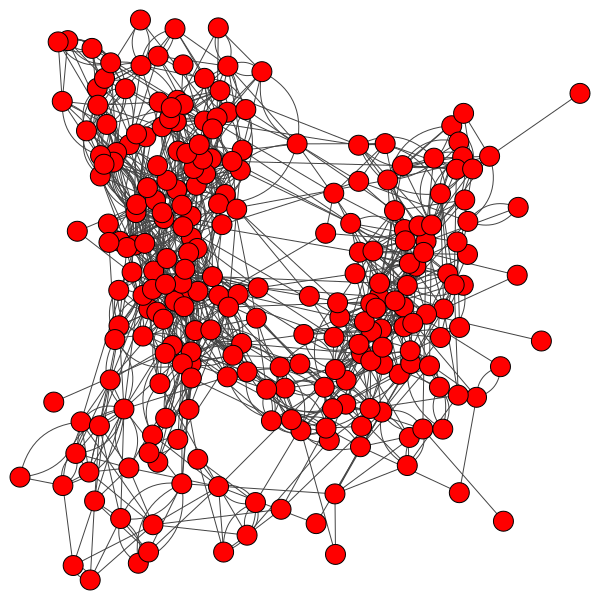

In [71]:
layout = g.layout("fruchterman_reingold")
ig.plot(g, layout = layout)

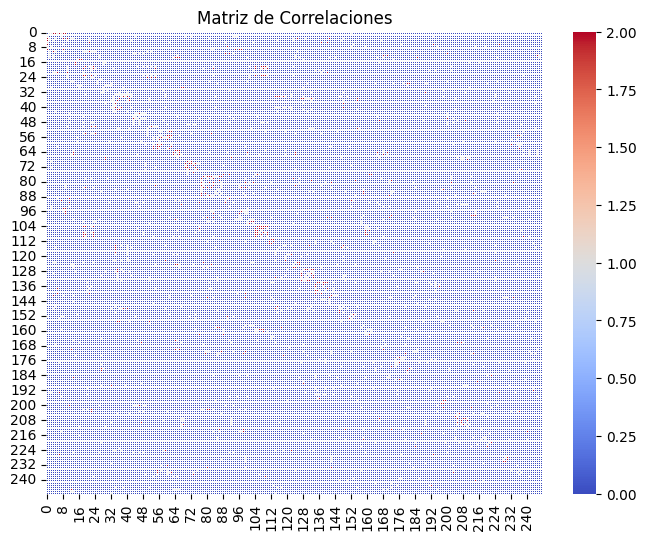

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(np.array(g.get_adjacency().data), annot=False, cmap='coolwarm', fmt=".2f", linewidths= 0.5 )
plt.title('Matriz de Correlaciones')
plt.show()

In [73]:
# Calcular los nodos
nodos = np.unique(A.flatten())

# Calcular la centralidad de grado
centralidad_grado = g.degree()

# Obtener los índices de los nodos con mayor centralidad de grado
top_indices = np.argsort(centralidad_grado)[-5:][::-1]

# Obtener los nombres de los nodos correspondientes a los índices
top_nodos = [nodos[idx] for idx in top_indices]

print("Top 5 nodos más propensos a emitir/recibir relaciones:", top_nodos)

Top 5 nodos más propensos a emitir/recibir relaciones: [38, 21, 26, 86, 89]


### PREGUNTA 10. 

Sintetizar y replicar la Sección 2.4.2 (Special Types of Graphs, p. 24) de Kolaczyk and Csárdi (2020).

### Special Types of Graphs

Graphs come in all shapes and sizes, as it were, but there are a number of families 
of graphs that are commonly encountered in practice. We illustrate this notion wit 
the examples of four such families shown in Fig. 2.2.

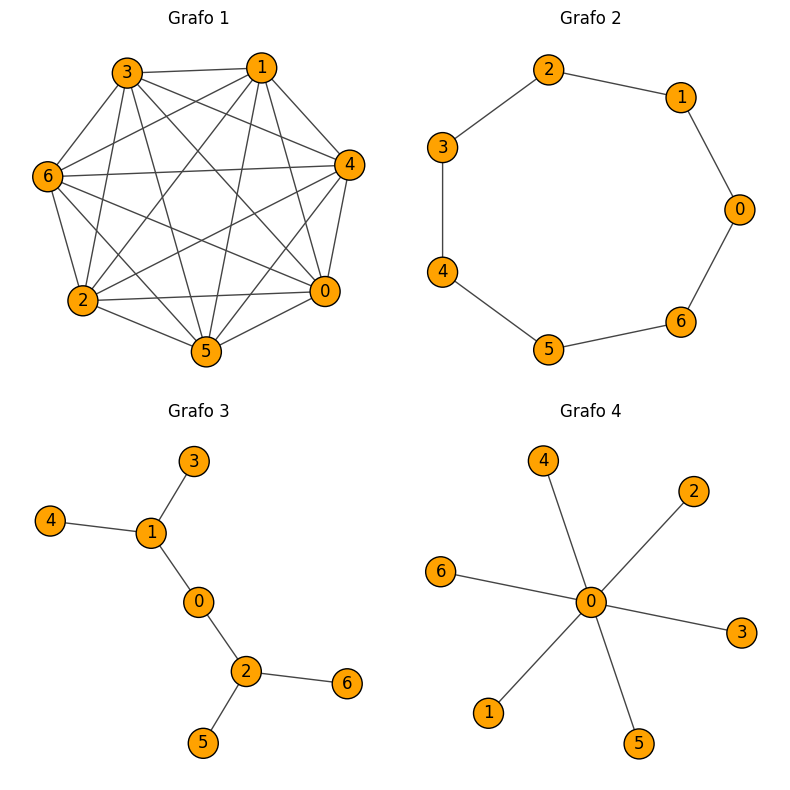

In [74]:
# Crear un grafo completo
g_full = ig.Graph.Full(7)

# Crear un grafo en forma de anillo
g_ring = ig.Graph.Ring(7)

# Crear un árbol
g_tree = ig.Graph.Tree(7, 2)

# Crear un grafo en forma de estrella
g_star = ig.Graph.Star(7)

# Plotear los gráficos en subplots

def graficar_grafos(grafos):
    plt.figure(figsize=(8, 8))
    num_grafos = len(grafos)
    rows = (num_grafos + 2) // 3
    cols = min(num_grafos, 2)
    
    for i, g in enumerate(grafos, 1):
        plt.subplot(rows, cols, i)
        ig.plot(g, bbox=(0, 0, 100, 100), edge_width = 1,vertex_color="#FFA200" ,target=plt.gca(),vertex_label=g.vs.indices)
        plt.title(f"Grafo {i}")

    plt.tight_layout()
    plt.show()
    
graficar_grafos([g_full,g_ring,g_tree,g_star])


A complete graph is a graph where every vertex is joined to every other vertex by 
an edge. This concept is perhaps most useful i  practice through its role in defining 
cliqu , which is a complete subgraph. Shown in Fig. 2.2 is a complete graph  order Nv N  = 7, meaning that each vertex is connected to all of  he other six vertices.

A regular graph is a graph in which every vertex has the same degree. A regular graph with common degree d is called d-regular. An example of a 2-regular graph is the ring shown in Fig. 2.2. The standard lattice, such as is associated visually with a checker board, is an example of a 4-regular graph. 

A connected graph with no cycles is called a tree. The disjoint union of such graphs is called a forest. Trees are of fundamental importance in the analysis of networks. They serve, for example, as a key data structure in the efficient design of many computational algorithms. A digraph whose underlying graph is a tree is called a directed tree. Often such trees have associated with them a special vertex called a root, which is distinguished by being the only vertex from which there is a directed path to every other vertex in the graph. Such a graph is called a rooted tree. A vertex preceding another vertex on a path from the root is called an ancestor, while a vertex following another vertex is called a descendant. Immediate ancestors are called parents, and immediate descendants, children. A vertex without any children is called a leaf. The distance from the root to the farthest leaf is called the depth of the tree. 

Given a rooted tree of this sort, it is not uncommon to represent it diagrammatically without any indication of its directedness, as this is to be understood from the definition of the root. Such a representation of a tree is shown in Fig. 2.2. Treating
vertex 1 as the root, this is a tree of depth 2, wherein each vertex (excluding the leafs) is the ancestor of two descendants.

A k-star is a special case of a tree, consisting only of one root and k leaves. Such graphs are useful for conceptualizing a vertex and its immediate neighbors (ignoring any connectivity among the neighbors). A representation of a 7-star is given in Fig. 2.2.

An important generalization of the concept of a tree is that of a directed acyclic graph (i.e., the DAG). A DAG, as its name implies, is a graph that is directed and that has no directed cycles. However, unlike a directed tree, its underlying graph is
not a tree, in that replacing the arcs with undirected edges leaves a (simple) graph that contains cycles. Our toy graph dg, for example, is directed but not a DAG

In [75]:
g.is_dag()

False

since the underlying graph is a triangle and hence a 3-cycle. Nevertheless, it is often possible to still design efficient computational algorithms on DAGs that take advantage of this near-tree-like structure.

Lastly, a bipartite graph is a graph G = (V, E) such that the vertex set V may 
be partitioned into two disjoint sets, say V1 and V2, and each edge in E has on 
endpoint in V1 and the other in V2. Such graphs typically are used to represet
‘membership’ networks, for example, with ‘members’ denoted by vertices in V1,  nd
the corresponding ‘organizations’, by vertices in V2. For example, they are pop lar
in studying the relationship between actors and movies, where actors and m vies
play the roles of membe 
s and organizations, respectively.

In [76]:
# Definir el grafo bipartito
g_bip = ig.Graph.Formula("actor1:actor2:actor3, movie1:movie2, actor1:actor2 - movie1, actor2:actor3 - movie2")

# Asignar atributos a los vértices
V = g_bip.vs
V["type"] = [name.startswith("movie") for name in V["name"]]

<Figure size 800x800 with 0 Axes>

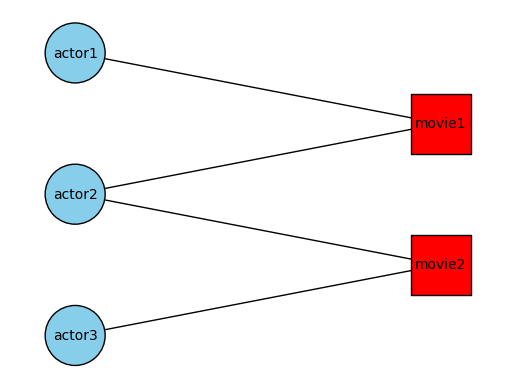

In [77]:
# Definir colores y formas para los vértices
colors = ["red" if v["type"] else "skyblue" for v in V]
shapes = ["rectangle" if v["type"] else "circle" for v in V]

# Definir disposición de los vértices en forma de dos triángulos
actor_positions = [(0, 1), (0, 0), (0, -1)]  # Triángulo para actores
movie_positions = [(1, 0.5), (1, -0.5), (1, -1)]  # Triángulo para películas
positions = actor_positions + movie_positions

# Graficar el grafo bipartito
plt.figure(figsize=(8, 8))
fig, ax = plt.subplots()
plot = ig.plot(g_bip, target=ax, layout=positions, vertex_color=colors, vertex_shape=shapes, vertex_size=60, vertex_label_size=10, 
               vertex_label_dist=0,edge_width = 1 , edge_color="black", vertex_label=g_bip.vs["name"])

# Mostrar la gráfica
plt.show()

It is not uncommon to accompany a bipartite graph with at least one of two possible induced graphs. Specifically, a graph G1 = (V1, E1) may be defined on the vertex set V1 by assigning an edge to any pair of vertices that both have edges in E to at least one common vertex in V2. Similarly, a graph G2 may be defined on V2. Each of these graphs is called a projection onto its corresponding vertex subset. For example, the projection of the actor-movie network g.bip onto its two vertex subsets yields

Within the actor network, actor2 is adjacent to both actor1 and actor3, as the former actor was in movies with each of the latter actors, although these latter were not themselves in any movies together, and hence do not share an edge. The movie network consists simply of a single edge defined by movie1 and movie2, since these movies had actors in common.